In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score
# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [94]:
df = pd.read_csv("./20202021data.csv", encoding = "euc-kr")


In [95]:
df = df[['상장유지년도_2020(X1)', '2020 배당성향(X3)', '2020 배당률(X4)',
       '당기순손실여부_2020(X5)', '주당순이익감소여부_2020(X6)', '유동비율_전기(X7)', '부채비율_전기(X8)',
       '총자산증가율_전기(X10)', '매출액증가율_전기(X11)', '매출액순이익률_전기(X12)',
       '총자본영업이익률_전기(X13)', '자기자본순이익률_전기(X14)', '2020_외국인지분율(X17)',
       '외국인지분율변동_2020(X18)', '배당정책_2020(Y)']]

In [96]:
# 열이름 깔끔하게 변경
df.columns = [ '상장유지년도(X1)', '배당성향(X2)', '배당률(X3)',
       '당기순손실여부(X4)', '주당순이익감소여부(X5)', '유동비율(X6)', '부채비율(X7)',
       '총자산증가율(X8)', '매출액증가율(X9)', '매출액순이익률(X10)',
       '총자본영업이익률(X11)', '자기자본순이익률(X12)', '외국인지분율(X13)',
       '외국인지분율변동(X14)', '배당정책_(Y)']

In [97]:
df.head(3)

,상장유지년도(X1),배당성향(X3),배당률(X4),당기순손실여부(X5),주당순이익감소여부(X6),유동비율(X7),부채비율(X8),총자산증가율(X10),매출액증가율(X11),매출액순이익률(X12),총자본영업이익률(X13),자기자본순이익률(X14),외국인지분율(X17),외국인지분율변동(X18),배당정책_(Y)
0,6,296.433,21.0,0,1,31.77,303.47,-2.23,15.77,3.77,4.18,5.74,10.75,0,0
1,22,1.963,8.0,0,1,7.56,30.54,10.30,34.22,20.66,4.69,1.82,8.39,1,0
2,4,8.452,24.0,0,0,143.14,170.04,-12.06,26.74,4.11,12.24,17.57,10.70,1,1


# 표준화 작업

In [101]:
from sklearn.preprocessing import StandardScaler

InputFeature = df.iloc[:,:-1].values
Label = df.iloc[:, -1]

InputFeature = StandardScaler().fit_transform(InputFeature)

features = [  '상장유지년도(X1)', '배당성향(X2)', '배당률(X3)',
       '당기순손실여부(X4)', '주당순이익감소여부(X5)', '유동비율(X6)', '부채비율(X7)',
       '총자산증가율(X8)', '매출액증가율(X9)', '매출액순이익률(X10)',
       '총자본영업이익률(X11)', '자기자본순이익률(X12)', '외국인지분율(X13)',
       '외국인지분율변동(X14)']
df_st = pd.DataFrame(InputFeature, columns=features)
df_st.head()

,상장유지년도(X1),배당성향(X3),배당률(X4),당기순손실여부(X5),주당순이익감소여부(X6),유동비율(X7),부채비율(X8),총자산증가율(X10),매출액증가율(X11),매출액순이익률(X12),총자본영업이익률(X13),자기자본순이익률(X14),외국인지분율(X17),외국인지분율변동(X18)
0,-1.171724,1.888182,-0.181354,-0.329415,1.223209,-0.285763,4.480999,-0.645084,0.088754,-0.365530,-0.231848,-0.191291,0.233730,-1.118413
1,0.081638,-0.307974,-0.224765,-0.329415,1.223209,-0.302159,-0.550302,0.057682,0.489657,0.419517,-0.143512,-0.609845,0.016800,0.894124
2,-1.328394,-0.259579,-0.171336,-0.329415,-0.817522,-0.210338,2.021297,-1.196416,0.327123,-0.349727,1.164206,1.071846,0.229134,0.894124
3,-1.093389,0.116498,-0.214747,-0.329415,-0.817522,2.476984,-1.062963,-0.470094,0.713901,1.458809,-0.588656,-0.641878,-0.002503,0.894124
4,-1.328394,-0.070631,0.549950,-0.329415,1.223209,-0.251724,3.380465,-0.005135,-0.171778,-0.445940,0.272187,1.197839,2.078548,0.894124


In [102]:
# train test set 8:2 로 분리
train_x = df_st.iloc[:int(len(df_st) * 0.8), :]
train_y = Label[ : int(len(Label) * 0.8)]

test_x = df_st.iloc[int(len(df_st) * 0.8) :, :]
test_y = Label[int(len(Label) * 0.8) : ]

In [103]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(531, 14)
(531,)
(133, 14)
(133,)


Feature ranking:
1. feature 자기자본순이익률(X14) (0.100)
2. feature 매출액순이익률(X12) (0.100)
3. feature 배당률(X4) (0.100)
4. feature 매출액증가율(X11) (0.087)
5. feature 주당순이익감소여부(X6) (0.087)
6. feature 총자본영업이익률(X13) (0.085)
7. feature 총자산증가율(X10) (0.082)
8. feature 외국인지분율(X17) (0.078)
9. feature 부채비율(X8) (0.072)
10. feature 유동비율(X7) (0.070)
11. feature 배당성향(X3) (0.070)
12. feature 상장유지년도(X1) (0.054)
13. feature 외국인지분율변동(X18) (0.013)
14. feature 당기순손실여부(X5) (0.004)


<Figure size 432x288 with 0 Axes>

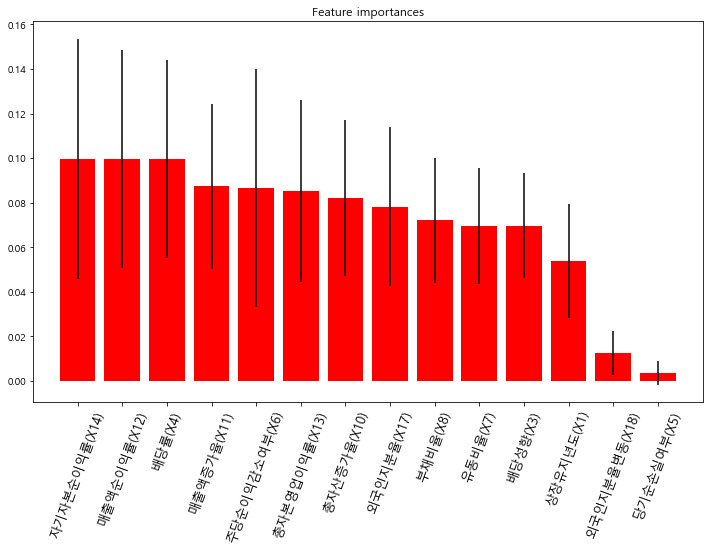

In [104]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(train_x, train_y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, train_x.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize=(12, 7))

plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color = 'r', yerr=std[indices], align='center')
plt.xticks(range(train_x.shape[1]), train_x.columns[indices], rotation=70)
plt.xlim([-1, train_x.shape[1]])

plt.show()


In [107]:
# 정밀도 재현율 f-1score 정확도 등등 계산
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

print(classification_report(test_y, forest.predict(test_x), target_names=['1', '0'], labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.63      0.69      0.66        59
           0       0.74      0.68      0.70        74

    accuracy                           0.68       133
   macro avg       0.68      0.69      0.68       133
weighted avg       0.69      0.68      0.69       133



In [108]:
# 정확도 계산
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

accuracy_score(test_y, forest.predict(test_x))

0.6842105263157895

In [109]:
# confustion matrix 계산

confusion_matrix(test_y, forest.predict(test_x), labels=[1, 0])

array([[41, 18],
       [24, 50]], dtype=int64)

In [113]:
# auc 점수 계산
from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_y, forest.predict(test_x)))

0.6852954649564819
